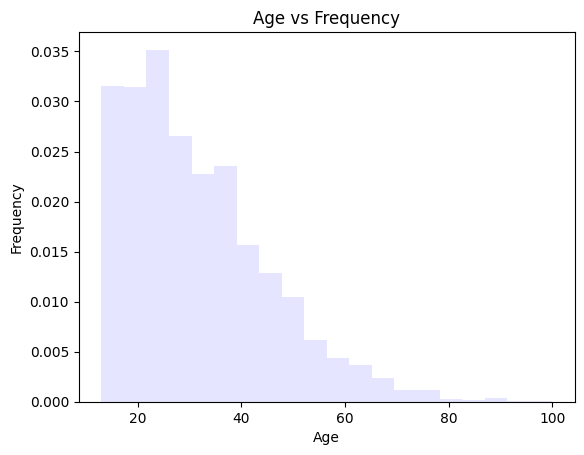

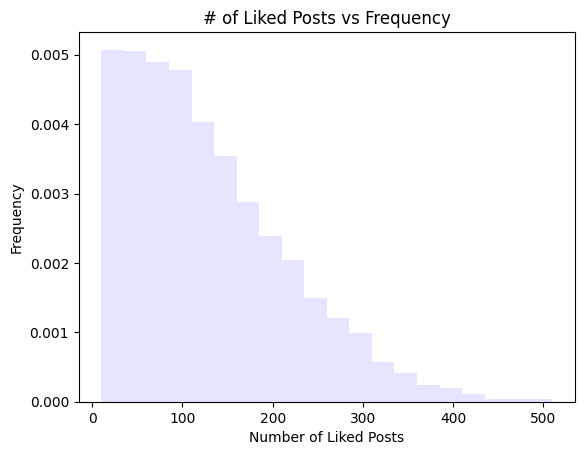

In [210]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
from faker import Faker
import numpy as np
import pandas as pd

fake = Faker()
Faker.seed(1)

#hist1 for age
numValues = 5000
maxValue = 87
skewness = 100

random = skewnorm.rvs(a = skewness, loc = maxValue, size = numValues)

random = random - min(random)
random = random / max(random)
random = random * maxValue

age = [round(x) + 13 for x in list(random)]

plt.hist(age, 20, density=True, color = 'blue',alpha = 0.1) #label axis
plt.title('Age vs Frequency')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#hist2 for posts

numValues = 5000
maxValue = 500
skewness = 5000

random = skewnorm.rvs(a=skewness, loc=maxValue, size = numValues)

random = random - min(random)
random = random / max(random)
random = random * maxValue

posts = [round(x) + 10 for x in list(random)]

plt.hist(posts, 20, density=True, color = 'blue', alpha = 0.1) #label axis
plt.title('# of Liked Posts vs Frequency')
plt.xlabel('Number of Liked Posts')
plt.ylabel('Frequency')
plt.show()

In [211]:
from collections import OrderedDict
Faker.seed(1)

sports = ['sports_football', 'sports_soccer', 'sports_baseball', 'sports_hockey', 'sports_lacrosse', 'sports_basketball']
food = ['food_indian', 'food_mexican', 'food_chinese', 'food_thai', 'food_italian', 'food_american']
fashion = ['fashion_athletic', 'fashion_casual', 'fashion_formal', 'fashion_accessories']

pet = OrderedDict([("pet_cat", 0.35), ("pet_dog", 0.55), ("pet_fish", 0.1), ("pet_guineapig", 0.05), ("pet_other", 0.05)])

items = {"Sports": sports, "Fashion" : fashion, "Food": food, "Pets": pet}

fake_data = {}

for tots in range(len(posts)):
    username = fake.user_name()

    ages = age[tots]

    q = fake.random_choices([[0.33,0.34,0.33], [0.9,0.1], [0.5,0.1,0.2,0.1], [0.1, 0.7, 0.1, 0.1], 
                         [0.4,0.4,0.2], [0.5,0.5], [0.25,0.25,0.25,0.25], [0.6, 0.2, 0.2]])[0]

    w = fake.random_elements(list(items.values()), unique=True, length=len(q))

    post_total = posts[tots]
    
    post_dict = {}
    for item in range(len(q)):
        y = fake.random_choices([[0.33,0.34,0.33], [0.9,0.1], [0.5,0.1,0.2,0.1], [0.1, 0.7, 0.1, 0.1], 
                         [0.4,0.4,0.2], [0.5,0.5], [0.25,0.25,0.25,0.25], [0.6, 0.2, 0.2]])[0]
        e = [x*q[item] for x in y]
        random_in_category = fake.random_elements(w[item], unique=True, length=len(y))
    
        posts_totals = [round(x*post_total) for x in e]
        for j in range(len(random_in_category)):
            post_dict[random_in_category[j]] = posts_totals[j]
            
    post_dict['age'] = ages
    
    fake_data[username] = post_dict

df = pd.DataFrame.from_dict(fake_data, orient="index")    
df = df.fillna(0)


df["sports"] = df[ [ c for c in df.columns if "sports" in c ] ].sum( axis = 1 )
df["fashion"] = df[ [ c for c in df.columns if "fashion" in c ] ].sum( axis = 1 )
df["food"] = df[ [ c for c in df.columns if "food" in c ] ].sum( axis = 1 )
df["pet"] = df[ [ c for c in df.columns if "pet" in c ] ].sum( axis = 1 )

aging = df['age']
#df = df.drop(['age'], axis=1)
df['Top Likes'] = df.idxmax(axis=1)
df['Top Likes'] = [x.split("_")[0] for x in df['Top Likes']]
df['age'] = aging
df['age_group'] = pd.cut(df["age"],bins=[13, 18, 25, 60, 100],labels=["Teenager", "Young Adult", "Adult", "Senior"])
df['Total Likes'] = df[["sports", "fashion", "food", "pet"]].sum(axis=1)
df


,pet_dog,pet_cat,pet_other,pet_guineapig,fashion_athletic,fashion_formal,food_american,food_mexican,food_thai,food_chinese,...,pet_fish,sports_baseball,sports_football,sports,fashion,food,pet,Top Likes,age_group,Total Likes
ashleypham,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,2.0,2.0,4.0,12.0,age,Adult,20.0
twilliams,6.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,6.0,...,6.0,0.0,0.0,0.0,0.0,28.0,28.0,age,Adult,56.0
shelleygutierrez,0.0,3.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,6.0,...,0.0,1.0,0.0,3.0,4.0,29.0,3.0,food,Young Adult,39.0
xjackson,16.0,2.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0,6.0,...,0.0,2.0,0.0,17.0,18.0,18.0,18.0,fashion,Teenager,71.0
caroline45,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,2.0,8.0,0.0,1.0,age,Adult,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mwilliams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,30.0,120.0,120.0,0.0,0.0,sports,Adult,240.0
margaretmason,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,18.0,18.0,0.0,0.0,age,Adult,36.0
kathleen93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,10.0,87.0,0.0,0.0,fashion,Young Adult,97.0
williamschad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26.0,52.0,52.0,0.0,0.0,sports,Adult,104.0


In [212]:
Top_Likes = df.groupby("Top Likes").count()[['pet_dog']]
Top_Likes.columns = ["Most Liked Category"]
Top_Likes = Top_Likes.sort_values(by='Most Liked Category', ascending=False)
Top_Likes

,Most Liked Category
Top Likes,
age,1443
sports,1017
fashion,894
food,788
pet,718


In [213]:
import plotly.express as px

fig = px.scatter(df.reset_index(), x="Total Likes", y="age", hover_data=df.columns[:-2], hover_name="index", title="User Likes vs Age")
fig.show()

#:-2

In [214]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df2 = df.drop(['age', 'age_group', 'Top Likes', 'sports', 'fashion', 'food', 'pet'], axis = 1)
scaler = StandardScaler()
df3 = scaler.fit_transform(df2)
pca = PCA(n_components=22)
components = pca.fit_transform(df3)

fig = px.scatter(components, x=0, y=1, color=df['Top Likes'],
                title="Fake Users Likes by Principal Coordinates")

fig.update_layout(
    xaxis_title="PC1",
    yaxis_title="PC2",
    legend_title="Most Liked Category",
    font=dict(
        size=18
    )
)
fig.show()

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of 

Text(0, 0.5, 'Within clusters sum of squares (WCSS)')

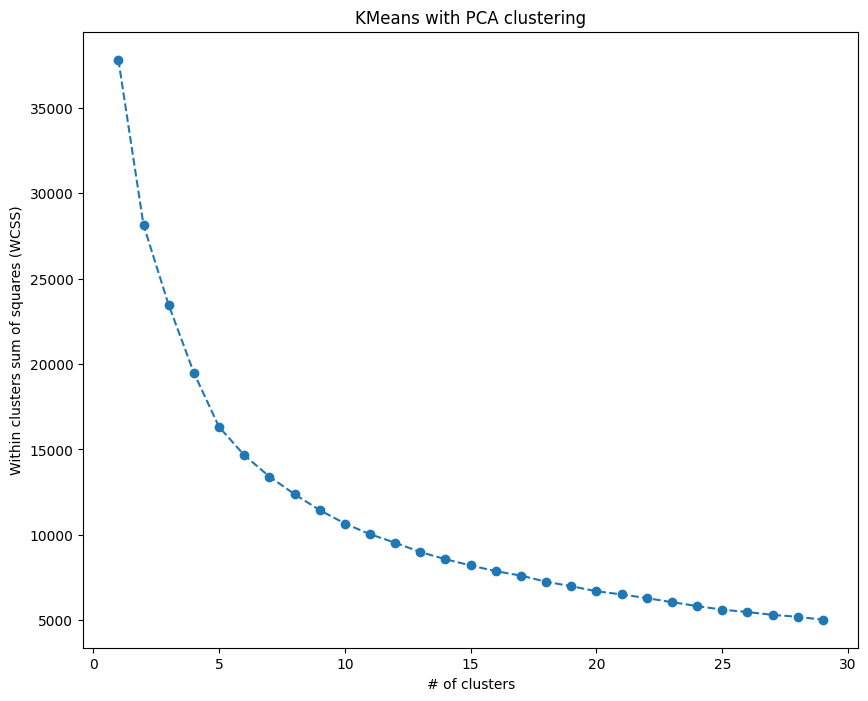

In [215]:
pca = PCA(n_components=4)
df_normalized = (df2 - df2.mean()) / df2.std()
components = pca.fit_transform(df_normalized)
scores = pca.transform(df_normalized)

wcss = []
for i in range(1,30):
    kmeans_pca = KMeans(n_clusters=i, init = "k-means++", random_state=1)
    kmeans_pca.fit(scores)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,8))
plt.plot(range(1,30), wcss, marker = "o", linestyle = "--")
plt.title("KMeans with PCA clustering")
plt.xlabel("# of clusters")
plt.ylabel("Within clusters sum of squares (WCSS)")


c:\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



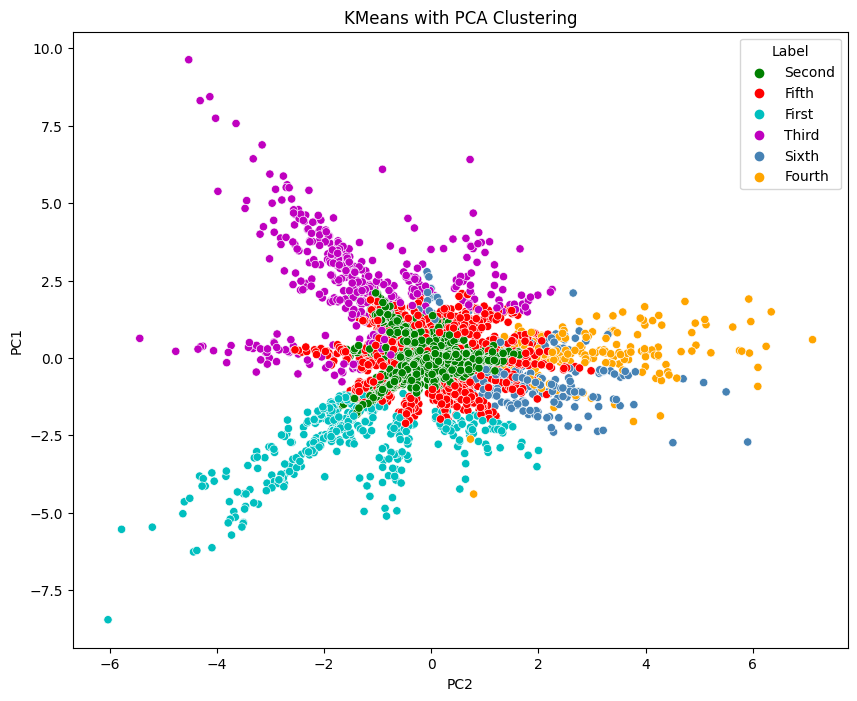

In [216]:
kmeans_pca = KMeans(n_clusters=6, init = "k-means++", random_state=1)
kmeans_pca.fit(scores)

dfk = pd.concat([df_normalized.reset_index(drop=True),pd.DataFrame(scores)], axis=1)
dfk.columns.values[-3:] = ['PC1', "PC2", "PC3"]
dfk['Segment'] = kmeans_pca.labels_
dfk['Label'] = dfk['Segment'].map({0:"First", 1:"Second",2:"Third",
                                  3:"Fourth",4:"Fifth",5:"Sixth"})


plt.figure(figsize=(10,8))
xax = dfk['PC3']
yax = dfk['PC2']

import seaborn as sns
sns.scatterplot(x="PC2",y="PC1", hue='Label', data = dfk, palette=['g','r', 'c', 'm', 'steelblue', 'orange'])
plt.title("KMeans with PCA Clustering")
#plt.xlabel("# of Clusters")
#plt.ylabel("WCSS")
plt.show()

In [217]:
dfk = dfk[['PC1', "PC2", "PC3", "Label", "Segment"]]
df = df.reset_index()
df = df.merge(dfk, left_index=True, right_index=True)
print(df.columns)


Index(['index', 'pet_dog', 'pet_cat', 'pet_other', 'pet_guineapig',
       'fashion_athletic', 'fashion_formal', 'food_american', 'food_mexican',
       'food_thai', 'food_chinese', 'sports_hockey', 'sports_basketball',
       'sports_soccer', 'sports_lacrosse', 'age', 'food_italian',
       'food_indian', 'fashion_accessories', 'fashion_casual', 'pet_fish',
       'sports_baseball', 'sports_football', 'sports', 'fashion', 'food',
       'pet', 'Top Likes', 'age_group', 'Total Likes', 'PC1', 'PC2', 'PC3',
       'Label', 'Segment'],
      dtype='object')


In [218]:
df = df.drop(['pet_dog', 'pet_cat', 'pet_other', 'pet_guineapig', 'fashion_athletic',
       'fashion_formal', 'food_american', 'food_mexican', 'food_thai',
       'food_chinese', 'sports_hockey', 'sports_basketball', 'sports_soccer',
       'sports_lacrosse', 'food_italian', 'food_indian',
       'fashion_accessories', 'fashion_casual', 'pet_fish', 'sports_baseball',
       'sports_football','PC1', 'PC2', 'PC3', 'Label'],axis=1)
df

,index,age,sports,fashion,food,pet,Top Likes,age_group,Total Likes,Segment
0,ashleypham,26,2.0,2.0,4.0,12.0,age,Adult,20.0,1
1,twilliams,40,0.0,0.0,28.0,28.0,age,Adult,56.0,1
2,shelleygutierrez,24,3.0,4.0,29.0,3.0,food,Young Adult,39.0,1
3,xjackson,17,17.0,18.0,18.0,18.0,fashion,Teenager,71.0,1
4,caroline45,38,2.0,8.0,0.0,1.0,age,Adult,11.0,1
...,...,...,...,...,...,...,...,...,...,...
4855,mwilliams,31,120.0,120.0,0.0,0.0,sports,Adult,240.0,0
4856,margaretmason,31,18.0,18.0,0.0,0.0,age,Adult,36.0,1
4857,kathleen93,25,10.0,87.0,0.0,0.0,fashion,Young Adult,97.0,1
4858,williamschad,28,52.0,52.0,0.0,0.0,sports,Adult,104.0,4


In [219]:
df1 = df[df['Segment']==0]


df1.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0
mean,31.468665,31.141689,136.256131,38.029973,14.640327,220.068120,0.0
std,13.458841,35.381938,48.856093,42.863319,18.066553,67.717577,0.0
min,13.000000,0.000000,78.000000,0.000000,0.000000,98.000000,0.0
25%,21.000000,0.000000,100.000000,0.000000,0.000000,167.000000,0.0
50%,29.000000,20.000000,120.000000,24.000000,12.000000,210.000000,0.0
75%,38.500000,44.000000,160.000000,53.500000,25.000000,264.000000,0.0
max,93.000000,144.000000,373.000000,190.000000,91.000000,478.000000,0.0


In [220]:
df2 = df[df['Segment']==1]


df2.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.0
mean,31.686486,13.082432,13.582432,13.051802,13.766667,53.483333,1.0
std,13.746888,14.409825,14.866386,14.617630,15.475768,26.038869,0.0
min,13.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.0
25%,21.000000,2.000000,2.000000,2.000000,2.000000,31.000000,1.0
50%,29.000000,9.000000,9.000000,9.000000,9.000000,54.000000,1.0
75%,40.000000,19.000000,20.000000,19.000000,20.000000,77.000000,1.0
max,100.000000,84.000000,88.000000,92.000000,91.000000,103.000000,1.0


In [221]:
df3 = df[df['Segment']==2]


df3.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.0
mean,32.465409,41.100629,40.851153,36.303983,127.570231,245.825996,2.0
std,14.918031,41.800727,41.057053,38.485262,49.516377,74.390444,0.0
min,13.000000,0.000000,0.000000,0.000000,67.000000,108.000000,2.0
25%,21.000000,0.000000,0.000000,0.000000,92.000000,186.000000,2.0
50%,29.000000,28.000000,26.000000,22.000000,113.000000,241.000000,2.0
75%,41.000000,74.000000,76.000000,69.000000,149.000000,290.000000,2.0
max,81.000000,219.000000,172.000000,165.000000,380.000000,496.000000,2.0


In [222]:
df4 = df[df['Segment']==3]


df4.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.0
mean,30.302885,168.701923,22.302885,26.697115,21.399038,239.100962,3.0
std,14.057150,52.470904,24.403999,31.129922,20.454956,68.520559,0.0
min,13.000000,99.000000,0.000000,0.000000,0.000000,115.000000,3.0
25%,19.000000,129.750000,0.000000,0.000000,0.000000,195.500000,3.0
50%,27.000000,153.000000,20.000000,20.500000,20.000000,225.000000,3.0
75%,37.000000,192.000000,32.000000,34.000000,30.250000,281.000000,3.0
max,90.000000,363.000000,204.000000,186.000000,98.000000,486.000000,3.0


In [223]:
df5 = df[df['Segment']==4]


df5.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.0
mean,31.684538,39.878011,34.305361,35.724165,33.808081,143.715618,4.0
std,13.508995,27.856663,24.376023,25.032127,24.847210,36.593071,0.0
min,13.000000,0.000000,0.000000,0.000000,0.000000,92.000000,4.0
25%,20.500000,18.000000,13.000000,12.000000,12.000000,114.500000,4.0
50%,29.000000,39.000000,33.000000,35.000000,32.000000,135.000000,4.0
75%,40.000000,60.000000,53.500000,56.000000,53.500000,164.000000,4.0
max,100.000000,109.000000,90.000000,94.000000,100.000000,274.000000,4.0


In [224]:
df6 = df[df['Segment']==5]


df6.describe()

,age,sports,fashion,food,pet,Total Likes,Segment
count,301.000000,301.000000,301.00000,301.000000,301.000000,301.000000,301.0
mean,32.687708,26.933555,16.55814,139.079734,24.734219,207.305648,5.0
std,13.632149,34.319706,17.97760,49.138718,31.005523,67.992644,0.0
min,13.000000,0.000000,0.00000,77.000000,0.000000,90.000000,5.0
25%,22.000000,0.000000,0.00000,102.000000,0.000000,155.000000,5.0
50%,30.000000,18.000000,14.00000,124.000000,16.000000,199.000000,5.0
75%,41.000000,33.000000,28.00000,163.000000,35.000000,247.000000,5.0
max,77.000000,189.000000,95.00000,420.000000,164.000000,472.000000,5.0


In [236]:
Top_Likes = df.groupby(["age_group","Top Likes"]).count()['fashion']
Top_Likes.columns = ["Most Liked Category"]
Top_Likes


age_group    Top Likes
Teenager     age          109
             fashion      185
             food         164
             pet          126
             sports       234
Young Adult  age          229
             fashion      233
             food         180
             pet          180
             sports       255
Adult        age          987
             fashion      453
             food         417
             pet          382
             sports       494
Senior       age          113
             fashion       17
             food          22
             pet           20
             sports        23
Name: fashion, dtype: int64